In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import sys
import os

In [2]:
from brian2 import *
from brian2tools import *

import matplotlib.pyplot as plt
import scipy

from cx_spiking.constants import *

import cx_spiking.network_creation as nc

In [42]:
start_scope()

indices = array([0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1])
indices = np.zeros(len(indices))
times = array([1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15])*ms
G_ex = SpikeGeneratorGroup(1, indices, times)

indices = array([0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2])
indices = np.zeros(len(indices))
times = array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])*ms
G_in = SpikeGeneratorGroup(1, indices, times)

spm_ex = SpikeMonitor(G_ex)
spm_in = SpikeMonitor(G_in)

G_neurons = nc.generate_neuron_groups(1, eqs, threshold_eqs, reset_eqs, neuron_params)

ex_synapses = Synapses(G_ex, G_neurons, model=synapses_model, on_pre=synapses_eqs_ex)
ex_synapses.connect()
ex_synapses.w = 1
ex_synapses.set_states(synapses_params)

in_synapses = Synapses(G_in, G_neurons, model=synapses_model, on_pre=synapses_eqs_in)
in_synapses.connect()
in_synapses.w = 1
in_synapses.set_states(synapses_params)


spm_n = SpikeMonitor(G_neurons)
state_monitor = StateMonitor(G_neurons, ['Vm', 'gE', 'gI'], record=True)

run(15*ms)

In [43]:
#print(G_neurons.params)

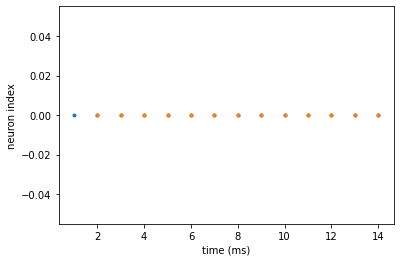

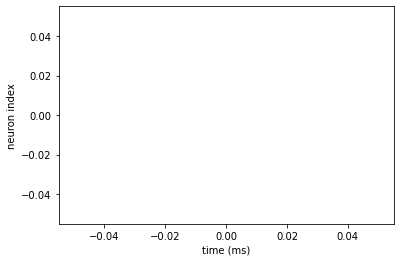

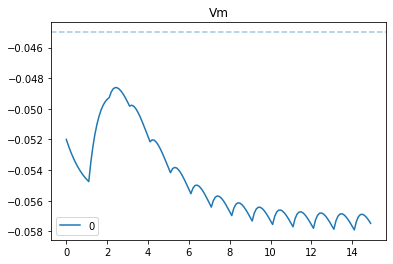

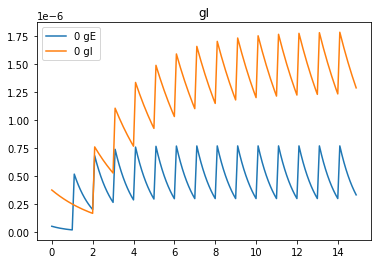

In [46]:
brian_plot(spm_ex)
brian_plot(spm_in)
plt.show()
brian_plot(spm_n)
plt.show()

for i in range(1):
    plot(state_monitor.t/ms, state_monitor.Vm[i], label=i)
plt.legend()
plt.axhline(Vt/volt, ls='--', alpha=0.4)
plt.title('Vm')
plt.show()

for i in range(1):
    plot(state_monitor.t/ms, state_monitor.gE[i], label=f'{i} gE')
plt.legend()
plt.title('gE')
#plt.show()

for i in range(1):
    plot(state_monitor.t/ms, state_monitor.gI[i], label=f'{i} gI')
plt.legend()
plt.title('gI')
plt.show()